# Advanced Data Science
<p/>

### Data Acquisition - Working with Unstructured Data (Real-Time and API Data)

In [6]:
#Pull in the libraries we need to read and print json files from the internet
import json
import requests
import pandas as pd
from pprint import pprint

#Pull in the url manipulation and a few different image libraries
from PIL import Image
import IPython
from IPython.display import display
import urllib.request
from io import BytesIO 

## Real Time Data Collection using `ESPN's API`
---
We access the ESPN's Website using the endpoint: <br>
https://site.api.espn.com/apis/search/v2

To get to access to the API and make HTTP requests, we send a query in a dictionary, such as:<br>
`parameters = {'query': '%s' %playerName}`

Our experiments today will be searching for MLB, NBA, and NHL player information. 

In [7]:
#First step is to setup a variable for the url/endpoint 
url = 'https://site.api.espn.com/apis/search/v2'

Shohei Ohtani currently plays (or has played) baseball for the Los Angeles Dodgers
Their player photo we found looks like this!


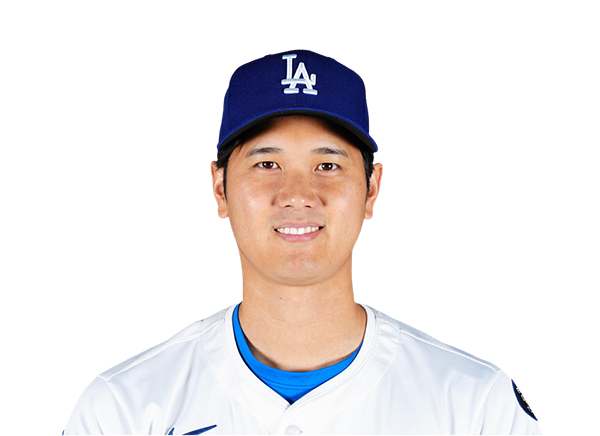

In [9]:
#We can get the player names individually through user input (1st example) or from a list (2nd example)
playerName = input("Enter a name of a player would you like to search for?")

#Setup the image url/link and query variables
imageurl = None
parameters = {'query': '%s' %playerName}

#Since we are requesting data from a live source, we add some code to exit upon error
try:
    #Use requests.get() to make an internet request. Set the output to variable `response` 
    #This takes two arguments: `url` which is the URL above and `params` which is the query
    response = requests.get(url = url, params = parameters)
    
    #Parse the text portion of the response into JSON with json.loads(response.text)
    response = json.loads(response.text)
    
    #If you want to print a nicely formatted JSON file, use pprint(response)
    #pprint(response)

    #Using the dictionary and list selection syntax, drill down to the data you seek
    current = response['results'][0]['contents'][0]
    #pprint(current)
    try:
        #We found a player, select the current sport, team name, and url to their image
        sport = current['sport']
        team = current['subtitle']
        imageurl = current['image']['default']
        print(playerName, 'currently plays (or has played)', sport, 'for the', team)
    except Exception as e:
        print('Error found:',e)
except Exception as e:
    print('Error found:',e)

#Display code for printing an image using a url using the IPython library
print("Their player photo we found looks like this!")
IPython.display.Image(imageurl, width = 250)

Shohei Ohtani currently plays (or has played) baseball for the Los Angeles Dodgers
Their player photo we found looks like this!


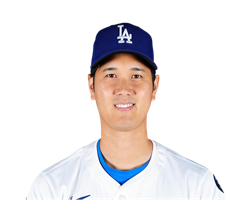

Freddie Freeman currently plays (or has played) baseball for the Los Angeles Dodgers
Their player photo we found looks like this!


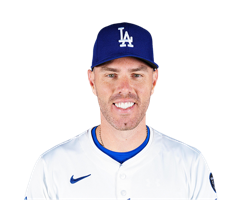

Nikola Jokic currently plays (or has played) basketball for the Denver Nuggets
Their player photo we found looks like this!


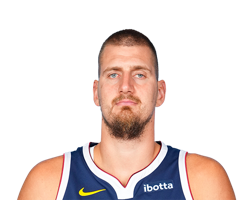

Giannis Antetokounmpo currently plays (or has played) basketball for the Milwaukee Bucks
Their player photo we found looks like this!


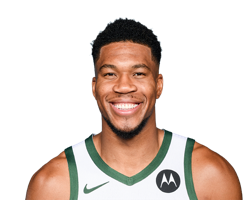

Connor McDavid currently plays (or has played) hockey for the Edmonton Oilers
Their player photo we found looks like this!


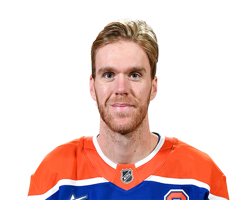

Nathan MacKinnon currently plays (or has played) hockey for the Colorado Avalanche
Their player photo we found looks like this!


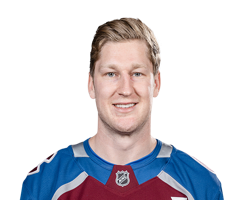

In [10]:
#If you want to gather data on a list of MLB, NBA, and NHL player names, set that up first 
playerNames = ['Shohei Ohtani', 'Freddie Freeman', 
               'Nikola Jokic', 'Giannis Antetokounmpo', 
               'Connor McDavid', 'Nathan MacKinnon']

#Setup the image url/link and player list to store for each interation of the loop
imageurl = None
playerList = []

#Loop through the players and call the ESPN API again like above
for playerName in playerNames:
    #setup the query variable for each player as we loop through
    parameters = {'query': '%s' %playerName}
    
    try:
        #Use requests.get() to make an internet request. Set the output to variable `response` 
        #This takes two arguments: `url` which is the URL above and `params` which is the query
        response = requests.get(url = url, params = parameters)
        response = json.loads(response.text)
        
        #If you want to print a nicely formatted JSON file, use pprint(response)
        #pprint(response)
        
        #Using the dictionary and list selection syntax, drill down to the data you seek
        current = response['results'][0]['contents'][0]
        #pprint(current)
        try:
            #We found a player, select the current sport, team name, and url to their image
            sport = current['sport']
            team = current['subtitle']
            imageurl = current['image']['default']
            print(playerName, 'currently plays (or has played)', sport, 'for the', team)

            #put data into a list for populating the dataframe when we are completed
            playerData = [playerName,sport,team,imageurl]
            playerList.append(playerData)
        
        except Exception as e:
            print('Error found:',e)
    except Exception as e:
        print('Error found:',e)

    #Display code for printing an image using a url using the urlib and Imaage libraries
    print("Their player photo we found looks like this!")
    with urllib.request.urlopen(imageurl) as imageurl:
        img = Image.open(BytesIO(imageurl.read()))
    img = img.resize((250, 200))
    display(img)

In [11]:
#Ultimately, this is where it differs from using structured data ... 
#We can still load the data into a pandas dataframe
#More processing would need to occur to setup separate X and y variables, the fun part!
playerData = pd.DataFrame(playerList, columns=['Player Name','Sport','Team','Image URL'])
playerData

,Player Name,Sport,Team,Image URL
0,Shohei Ohtani,baseball,Los Angeles Dodgers,https://a.espncdn.com/i/headshots/mlb/players/...
1,Freddie Freeman,baseball,Los Angeles Dodgers,https://a.espncdn.com/i/headshots/mlb/players/...
2,Nikola Jokic,basketball,Denver Nuggets,https://a.espncdn.com/i/headshots/nba/players/...
3,Giannis Antetokounmpo,basketball,Milwaukee Bucks,https://a.espncdn.com/i/headshots/nba/players/...
4,Connor McDavid,hockey,Edmonton Oilers,https://a.espncdn.com/i/headshots/nhl/players/...
5,Nathan MacKinnon,hockey,Colorado Avalanche,https://a.espncdn.com/i/headshots/nhl/players/...
